In [29]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from plotting import newfig, savefig
from torch.optim.lr_scheduler import StepLR
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
x = np.linspace(0,1,10)
print(x)
y = x**2
print(y)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.01234568 0.04938272 0.11111111 0.19753086 0.30864198
 0.44444444 0.60493827 0.79012346 1.        ]


array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [26]:
class neural_net(nn.Module):
    def __init__(self,  n_dim=1, n_output=1):
        super(neural_net, self).__init__()
        self.fc_1 = nn.Linear(n_dim, 256)
        self.fc_2 = nn.Linear(256, 256)

        self.out = nn.Linear(256, n_output)


        self.relu = nn.ReLU()
        self.prelu = nn.PReLU()
        self.tanh = nn.Tanh()
        self.activation = torch.relu

        with torch.no_grad():
            torch.nn.init.xavier_uniform(self.fc_1.weight)
            torch.nn.init.xavier_uniform(self.fc_2.weight)



    def forward(self, state, train=False):
        state = self.activation(self.fc_1(state))
        state = self.activation(self.fc_2(state))

        fn_u = self.out(state)
        return fn_u

In [21]:
nn_example = neural_net()

C:\Users\Haoya\AppData\Local\Temp\ipykernel_17420\925463493.py:16: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc_1.weight)
C:\Users\Haoya\AppData\Local\Temp\ipykernel_17420\925463493.py:17: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc_2.weight)


In [23]:
nn_example.forward(torch.tensor([1]).float())

tensor([0.0223], grad_fn=<AddBackward0>)

In [24]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [27]:
epochs = 100
learning_rate = 0.001
loss_list = []
optimizer = optim.Adam(nn_example.parameters(), lr=learning_rate)
for j in range(epochs):
    for x_i in x:
        optimizer.zero_grad()
        y_i = nn_example.forward(torch.tensor([x_i]).float())
        loss = (y_i-x_i**2)**2
        loss_list.append(loss.item())
        loss.backward()
        optimizer.step()




In [45]:
epochs = 100
learning_rate = 0.001
loss_list = []
optimizer = optim.Adam(nn_example.parameters(), lr=learning_rate)
for j in range(epochs):
    losssum = 0
    optimizer.zero_grad()
    for x_i in x:
        y_i = nn_example.forward(torch.tensor([x_i]).float())
        losssum += (y_i-x_i**2)**2
    loss_list.append(losssum.item())
    losssum.backward()
    optimizer.step()

In [46]:
# get output after training
y_list = []
for x_i in x:
    y_i = nn_example.forward(torch.tensor([x_i]).float())
    y_list.append(y_i.item())

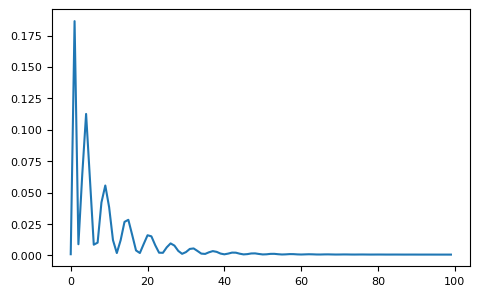

In [47]:
plt.plot(loss_list)

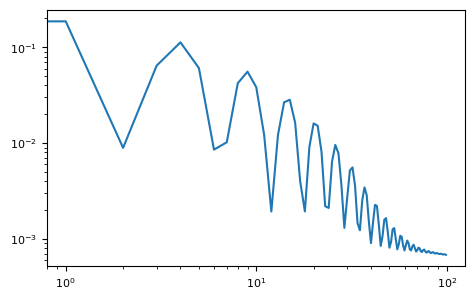

In [48]:
plt.loglog(loss_list)

In [49]:
y_list

[-0.01746680960059166,
 0.022291962057352066,
 0.0623139850795269,
 0.1066550686955452,
 0.19763731956481934,
 0.30857864022254944,
 0.4446306526660919,
 0.605073869228363,
 0.7974513173103333,
 0.9937297701835632]

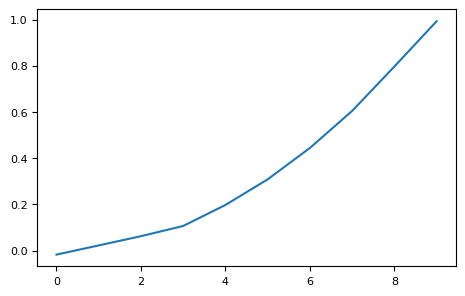

In [50]:
plt.plot(y_list)

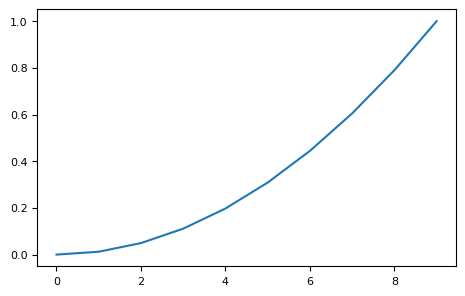

In [51]:
plt.plot(y)

In [52]:
dif = (y_list - y)

In [41]:
dif

array([-0.00762264,  0.02748701,  0.03851707,  0.02822425,  0.00553623,
        0.0116299 ,  0.01817155,  0.0266729 ,  0.02925236,  0.0021981 ])

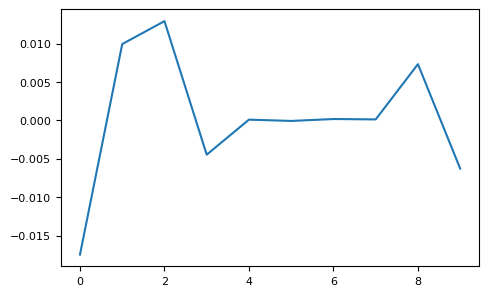

In [53]:
plt.plot(dif)